In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline

In [2]:
pd.options.display.max_rows = 3000

1. create line chart

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv", index_col="date", parse_dates=["date"])
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [5]:
df.quantile(0.025)[0]

17876.4

Clean the data by filtering out days when the page views were in:
- the top 2.5% of the dataset or 
- bottom 2.5% of the dataset.

In [6]:
df_1 = df[(df["value"] >= df["value"].quantile(0.025)) & 
          (df["value"] <= df["value"].quantile(0.975))]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


- create function: draw_line_plot (using matplotlib)
- title: Daily freeCodeCamp Forum Page Views 5/2016-12/2019
- x axis should be Date and the label on the y axis should be Page Views.


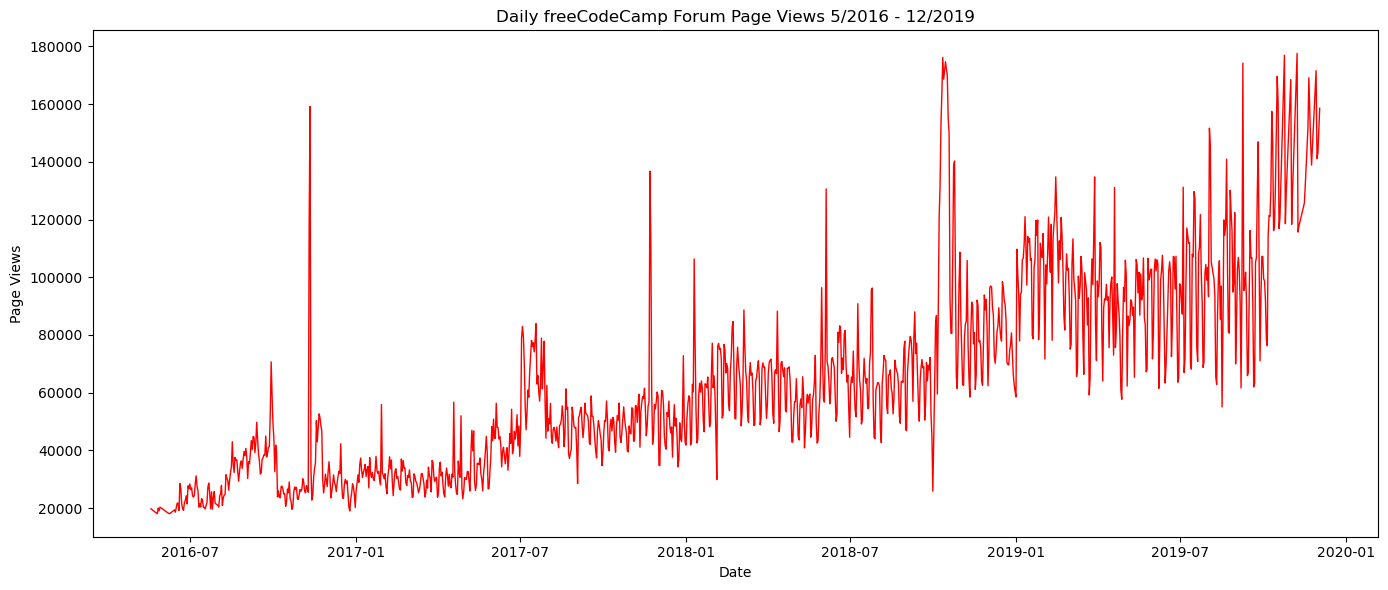

In [7]:
plt.figure(figsize=(14,6))
plt.plot(df_1.index, df_1["value"], color="red", linewidth=1)
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016 - 12/2019")

plt.tight_layout()


plt.show()

In [8]:
# def draw_line_plot():
#     fig, ax = plt.subplots(figsize=(12,6))
#     ax.plot(df_1.index, df_1["value"], color="red", linewidth=1)
#     ax.set_xlabel("Date")
#     ax.set_ylabel("Page Views")
#     ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    
#     fig.savefig("line_plot.png")
#     return fig

In [9]:
# draw_line_plot()

2. create bar chart

In [10]:
df_1.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [11]:
df_1.index.month

Int64Index([ 5,  5,  5,  5,  5,  6,  6,  6,  6,  6,
            ...
            11, 11, 11, 11, 11, 11, 11, 11, 12, 12],
           dtype='int64', name='date', length=1238)

In [12]:
df_bar = df_1.copy(deep=True)
df_bar.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [13]:
df_bar["Months"] = df_bar.index.month
df_bar.head()

,value,Months
date,,
2016-05-19,19736,5
2016-05-26,18060,5
2016-05-27,19997,5
2016-05-28,19044,5
2016-05-29,20325,5


In [14]:
df_bar["Months"].replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
         7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}, inplace=True)

In [15]:
df_bar.head()

,value,Months
date,,
2016-05-19,19736,May
2016-05-26,18060,May
2016-05-27,19997,May
2016-05-28,19044,May
2016-05-29,20325,May


In [16]:
df_bar["tahun"] = df_bar.index.year

In [17]:
df_bar["bulan_angka"] = df_bar.index.month

In [18]:
df_bar.head()

,value,Months,tahun,bulan_angka
date,,,,
2016-05-19,19736,May,2016,5
2016-05-26,18060,May,2016,5
2016-05-27,19997,May,2016,5
2016-05-28,19044,May,2016,5
2016-05-29,20325,May,2016,5


In [19]:
df_bar.groupby(["tahun", "Months", "bulan_angka"])["value"].mean()

tahun  Months     bulan_angka
2016   August     8               31049.193548
       December   12              27832.419355
       July       7               24109.678571
       June       6               21875.105263
       May        5               19432.400000
       November   11              40448.633333
       October    10              27398.322581
       September  9               41476.866667
2017   April      4               30878.733333
       August     8               47712.451613
       December   12              48420.580645
       February   2               31113.071429
       January    1               32785.161290
       July       7               65806.838710
       June       6               43577.500000
       March      3               29369.096774
       May        5               34244.290323
       November   11              57701.566667
       October    10              47438.709677
       September  9               47376.800000
2018   April      4           

In [20]:
df_bar = pd.DataFrame(df_bar.groupby(["tahun", "Months", "bulan_angka"])["value"].mean())
df_bar.reset_index(inplace=True)

In [21]:
df_bar.head()

,tahun,Months,bulan_angka,value
0,2016,August,8,31049.193548
1,2016,December,12,27832.419355
2,2016,July,7,24109.678571
3,2016,June,6,21875.105263
4,2016,May,5,19432.400000


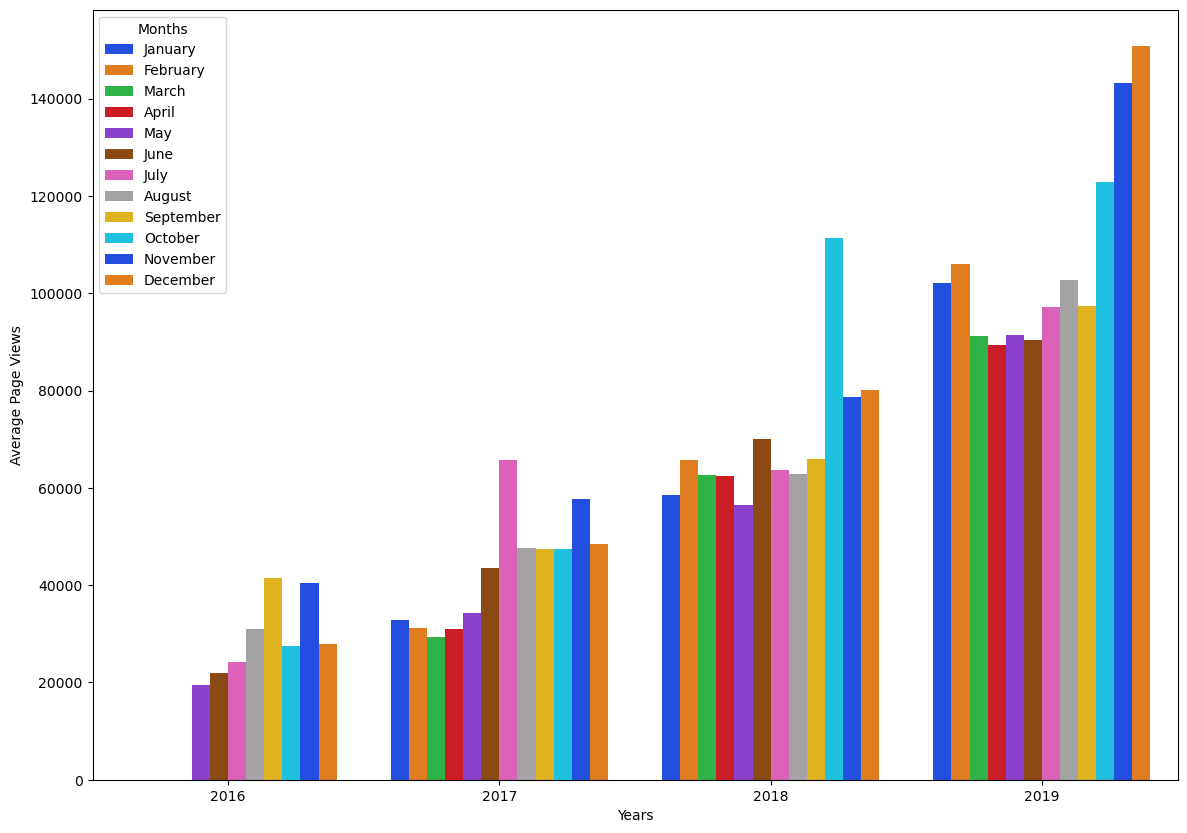

In [22]:
# https://www.codecademy.com/article/seaborn-design-ii
# https://stackoverflow.com/questions/27019079/move-seaborn-plot-legend-to-a-different-position
# setting hue order, so x-axis ordered by month

fig, ax = plt.subplots(figsize = (14,10))
ax = sns.barplot(data = df_bar, 
            x = "tahun", 
            y = "value", 
            hue = "Months",
            hue_order=['January', 'February', 'March', 'April', 'May', 'June', 
                    'July', 'August', 'September', 'October', 'November', 'December'],
            palette = "bright")

sns.move_legend(ax, "upper left")

ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")

plt.show()

In [23]:
fig.savefig('bar_plot.png')

3. buat box chart

In [24]:
df_box = df_1.copy(deep=True)

In [25]:
df_box.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [26]:
df_box.reset_index(inplace=True)
df_box.head()

,date,value
0,2016-05-19,19736
1,2016-05-26,18060
2,2016-05-27,19997
3,2016-05-28,19044
4,2016-05-29,20325


In [27]:
df_box["year"] = [d.year for d in df_box["date"]]

In [28]:
df_box["month"] = [d.strftime("%b") for d in df_box["date"]]

In [29]:
df_box["month_angka"] = [d.strftime("%m") for d in df_box["date"]]

In [30]:
df_box.head()

,date,value,year,month,month_angka
0,2016-05-19,19736,2016,May,05
1,2016-05-26,18060,2016,May,05
2,2016-05-27,19997,2016,May,05
3,2016-05-28,19044,2016,May,05
4,2016-05-29,20325,2016,May,05


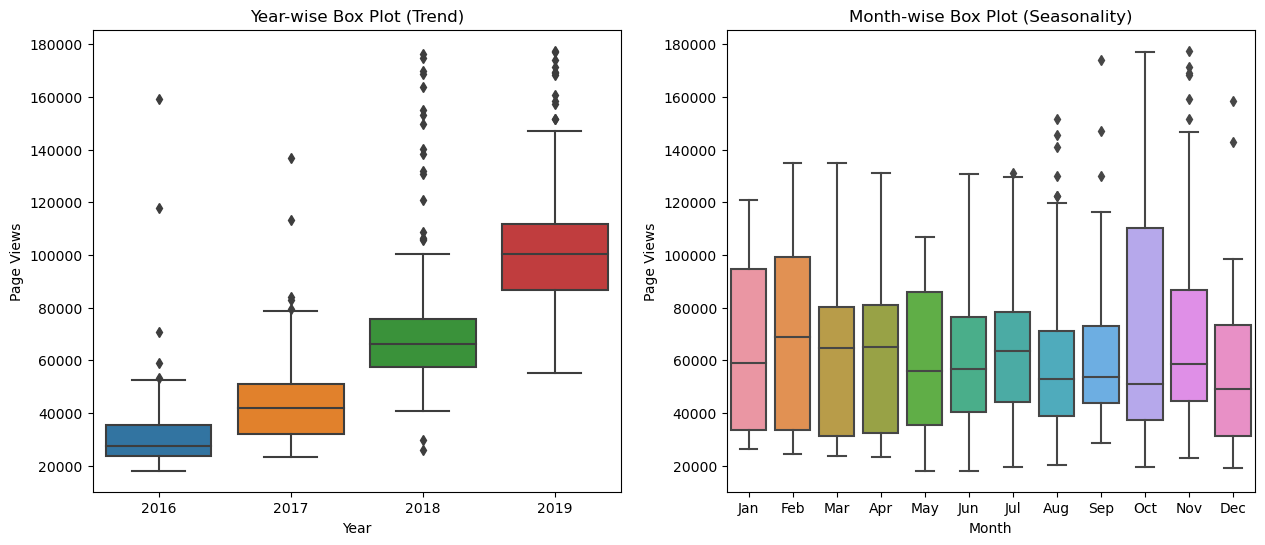

In [31]:
# title for each sub plot:
#     https://stackoverflow.com/questions/43920341/python-seaborn-facetgrid-change-titles
# =============================================================================================

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
p = sns.boxplot(data = df_box, 
            x = "year", 
            y = "value", ax=ax[0])
p.set_title("Year-wise Box Plot (Trend)")
p.set_xlabel("Year")
p.set_ylabel("Page Views")


q = sns.boxplot(data = df_box.sort_values(by="month_angka"), 
                x = "month", 
                y = "value", 
                ax=ax[1])
q.set_title("Month-wise Box Plot (Seasonality)")
q.set_xlabel("Month")
q.set_ylabel("Page Views")


plt.show()

In [32]:
fig.savefig('box_plot.png')